## **Chapter 18: Logistic Regression**
### Exercise 1: Diabetes
- Cho dữ liệu diabetes.csv
- Thông tin các cột dữ liệu:
- Pregnancies: số lần mang thai
- Glucose: Nồng độ glucose huyết tương 2 giờ trong thử nghiệm dung nạp glucose đường uống
- BloodPressure: Huyết áp tâm trương (mm Hg)
- SkinThickness: độ dày da gấp Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml). insulin huyết thanh 2-giờ
- BMI: (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)
- Chú ý: Tất cả các biến trên liên tục, mục đích là dự đoán ai đó có bị tiểu đường hay không (Outcome=1) dựa trên các biến khác. Các mẫu lấy từ phụ nữ trên 21 years old.


- Yêu cầu: Áp dụng LogisticRegression để thực hiện việc dự đoán khả
năng dương tính với bệnh tiểu đường (positive diabete - outputs) dựa
trên các biến lâm sàng khác (clinical variables - inputs)
- Hãy áp dụng LogisticRegression để dự đoán khả năng dương tính với bệnh tiểu đường
- Đọc dữ liệu và gán cho biến data.
- Xem thông tin data: head(), số dòng, số cột, str, summary
- Vẽ biểu đồ quan sát mối liên hệ giữa các biến (corrplot)
- Tạo train:test từ dữ liệu data với tỉ lệ 70:30
- Áp dụng thuật toán LogisticRegression
- Tìm kết quả
- Trực quan hóa kết quả
- Hãy cho biết với những người có pregnant, glucose, pressure, triceps, insulin, mass,
pedigree, age lần lượt như sau thì ai có khả năng dương tính với bệnh tiểu đường, ai không?
    - 8, 176, 90, 34, 300, 33.7, 0.467, 58
    - 1, 100, 66, 15, 56, 23.6, 0.666, 26
    - 12, 88, 74, 40, 54, 35.3, 0.378, 48

In [9]:
library(corrplot)
library(Amelia)


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [4]:
mydata <- read.csv("data/diabetes.csv")

In [5]:
print(summary(mydata))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [6]:
print(str(mydata))

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...
NULL


In [7]:
print(paste("cols:",ncol(mydata)))
print(paste("rows:",nrow(mydata)))

[1] "cols: 9"
[1] "rows: 768"


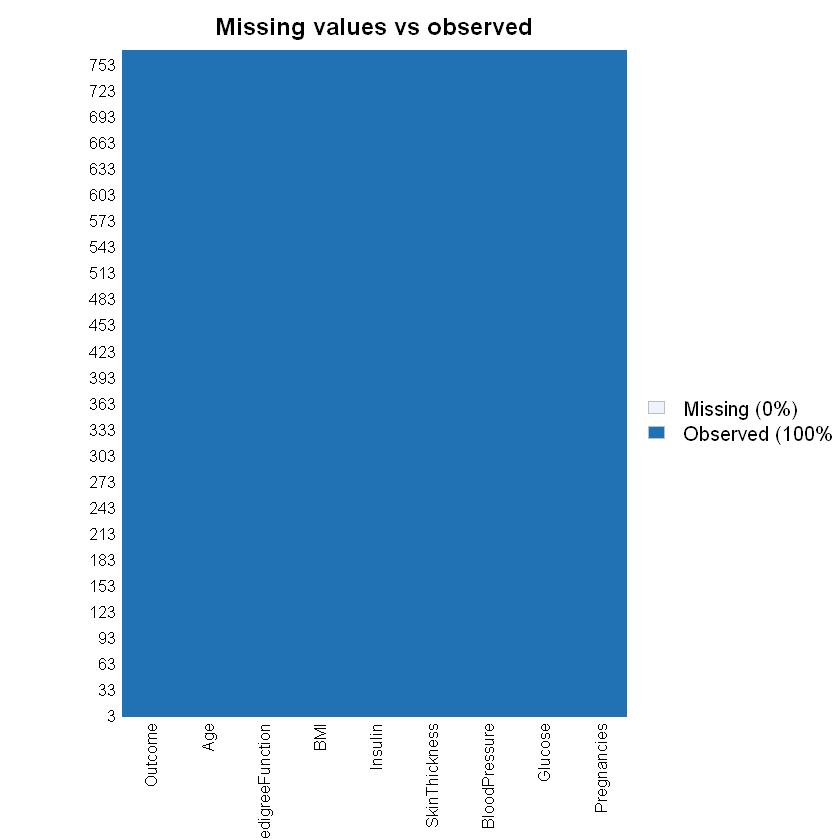

In [10]:
# check missing value
missmap(mydata, main = "Missing values vs observed")
# => no missing values


In [11]:
# Check Class bias
print(table(mydata$Outcome))


  0   1 
500 268 


In [12]:
# calculating the correlation between each pair of numeric variables
correlations <- cor(mydata[,1:9])
print(correlations)

                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

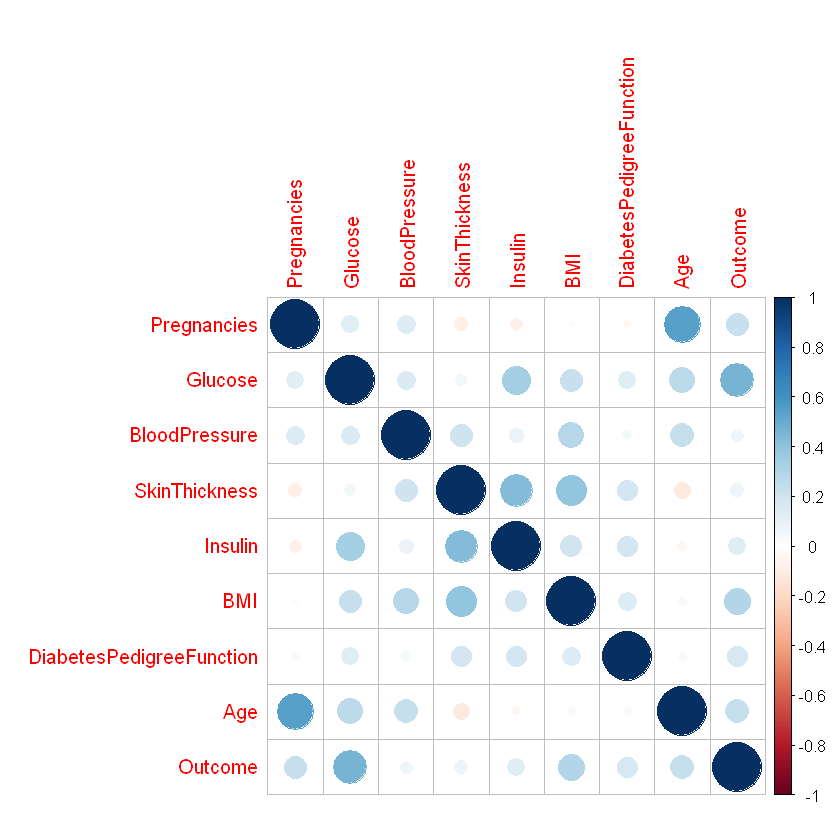

In [13]:
corrplot(correlations, method="circle")

In [14]:
# divided into train and test: 70 - 30
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = mydata[trainIndex ,]
test = mydata[-trainIndex ,]
print("Rows of training data and test data:")
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 538
[1] 230


In [15]:
# estimates a logistic regression model using the glm (generalized linear model) 
mylogit <- glm(Outcome ~ ., data = train, family = "binomial")
print(summary(mylogit))


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3333  -0.7096  -0.3846   0.6152   2.4766  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.956430   0.874772 -10.239  < 2e-16 ***
Pregnancies               0.169645   0.040565   4.182 2.89e-05 ***
Glucose                   0.041323   0.004773   8.658  < 2e-16 ***
BloodPressure            -0.015090   0.006222  -2.425   0.0153 *  
SkinThickness             0.005501   0.008775   0.627   0.5308    
Insulin                  -0.001513   0.001130  -1.338   0.1807    
BMI                       0.083616   0.018640   4.486 7.27e-06 ***
DiabetesPedigreeFunction  0.723590   0.388008   1.865   0.0622 .  
Age                       0.012880   0.011723   1.099   0.2719    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [16]:
pred = predict(mylogit, 
                newdata = test, 
                type = "response"
)
pred_value <- ifelse(pred > 0.5, 1, 0)
print("Testdata admit vs predict (10 rows:)")
result <- data.frame(testAdmit = test$Outcome[30:40], pred_value[30:40])
print(result)


[1] "Testdata admit vs predict (10 rows:)"
    testAdmit pred_value.30.40.
98          0                 0
102         0                 0
103         0                 0
105         0                 0
115         1                 1
120         0                 0
124         0                 0
126         1                 0
129         1                 0
131         1                 1
132         1                 1


In [17]:
print(pred_value[30:40])
print(test$Outcome[30:40])

 98 102 103 105 115 120 124 126 129 131 132 
  0   0   0   0   1   0   0   0   0   1   1 
 [1] 0 0 0 0 1 0 0 1 1 1 1


In [18]:
# SOLUTION 1
accuracy <- table(pred_value, test[,"Outcome"])
accuracy = sum(diag(accuracy))/sum(accuracy)
print(paste("Accuracy s1:", accuracy))

[1] "Accuracy s1: 0.752173913043478"


In [19]:
# SOLUTION 2
misClasificError <- mean(pred_value != test$Outcome)
print(paste('Accuracy s2: ',1-misClasificError))

[1] "Accuracy s2:  0.752173913043478"


In [20]:
summary(mylogit)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3333  -0.7096  -0.3846   0.6152   2.4766  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.956430   0.874772 -10.239  < 2e-16 ***
Pregnancies               0.169645   0.040565   4.182 2.89e-05 ***
Glucose                   0.041323   0.004773   8.658  < 2e-16 ***
BloodPressure            -0.015090   0.006222  -2.425   0.0153 *  
SkinThickness             0.005501   0.008775   0.627   0.5308    
Insulin                  -0.001513   0.001130  -1.338   0.1807    
BMI                       0.083616   0.018640   4.486 7.27e-06 ***
DiabetesPedigreeFunction  0.723590   0.388008   1.865   0.0622 .  
Age                       0.012880   0.011723   1.099   0.2719    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [22]:
# make new prediction
#. 8, 176, 90, 34, 300, 33.7, 0.467, 58
#. 1, 100, 66, 15, 56, 23.6, 0.666, 26
#. 12, 88, 74, 40, 54, 35.3, 0.378, 48

print(colnames(test))
y1 <- predict(mylogit, 
            newdata = data.frame(Pregnancies = c(8, 1, 12), 
            Glucose = c(176, 100, 88), 
            BloodPressure = c(90, 66, 74),
            SkinThickness = c(34, 15, 40),
            Insulin = c(300, 56, 54), 
            BMI = c(33.7, 23.6, 35.3), 
            DiabetesPedigreeFunction = c(0.467, 0.666, 0.378),
            Age = c(58, 26, 48)), 
            type='response') 
y1 <- ifelse(y1 > 0.5, 1, 0)
print("results:")
print(y1)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 
[1] "results:"
1 2 3 
1 0 0 
